# Linear Regression
Simple implementation of multivariate linear regression

**Mathematical background:**  
Given a set of $N$ input variables $X = \{x_1, x_2, ..., x_N\}$ of dimension $d$  ($x_i \in \mathbb{R}^d $) and target values $y$,
a linear model is assumed to find a linear weight vector $b$ that maps $X$ to $y$:  

$X \cdot b \approx y$  

which is equivalent to the minimization problem:  

$min_b \parallel Xb - y \parallel^2$

Using the Least Squares Estimation method, one can derive the solution:  

$b = (X^TX)^{-1}X^Ty$  

where $X^+ = (X^TX)^{-1}X^T$ is the pseudo-inverse of the matrix $X$

In [58]:
%%html
<style>.container {width: 98%}</style>

In [193]:
from __future__ import annotations

import numpy as np
import matplotlib.pyplot as plt

In [262]:
class LinearRegression:
    """
    Fit line (weighted linear function) using Least Squares Estimation (matrix inversion)

    Attributes
    ----------
    betas : numpy.ndarray
        Array of shape (n_features + 1) containing fit coefficients (including intercept)
    
    rsquared : float
        Coefficient of determination. Denotes the proportion of the variance in the 
        dependent variable that is predictable from the independent variable(s)

    Methods
    -------
    fit(X, y)
        Estimates the linear model betas (weights/coefficients)
        
    predict(X)
        Applies fit model on new data array and returns predictions
    """
    
    
    def __init__(self):
        self.betas = None
        self.rsquared = None
    
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> LinearRegression:
        """
        Estimates the linear model betas (weights/coefficients)
        
        Parameters
        ----------
        X : numpy.ndarray
            Array of training samples with shape (n_samples, n_features)
        
        y : numpy.ndarray
            Array of training targets with shape (n_samples,)
        """
        
        
        n_samples, n_features = X.shape
        
        X_aug = np.column_stack((np.ones(n_samples), X))  # to account for intercept
        
        k = 1e-6*X.min()  # to avoid inverting a singular matrix
        self.betas = np.linalg.inv(X_aug.T.dot(X_aug) + k*np.eye(n_features + 1)).dot(X_aug.T).dot(y)
        
        # R squared
        self.rsquared = ((y - self.predict(X))**2).sum() / ((y - np.mean(y))**2).sum()
        
        return self
    
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Applies fit model on new data array and returns predictions
        
        Parameters
        ----------
        X : numpy.ndarray
            Array of testing samples with shape (n_samples, n_features)
            
        Raises
        ------
        ValueError
            The fit() method has to be called first so that the betas
            are estimated
        """
        
        
        if self.betas is None:
            raise ValueError("Betas not fitted. Call fit() method first")
        
        n_samples, n_features = X.shape
        
        X_aug = np.column_stack((np.ones(n_samples), X))
        return X_aug.dot(self.betas)

### Mock data

In [272]:
# 1 million points, 100 dimensions
n_samples = 1_000_000
dims = 100
X = 10 + 100*np.random.random((n_samples, dims))

true_betas = 10*np.random.random(dims + 1)
y = true_betas[0] + X.dot(true_betas[1:]) + np.random.normal(loc=0, scale=50.0, size=n_samples)

### Test model

In [273]:
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

In [274]:
f"{np.isclose(reg.betas, true_betas, rtol=0.01).sum()} out of {true_betas.shape[0]} coefficients were correct within 1% error"

'100 out of 101 coefficients were correct within 1% error'

In [277]:
f"{np.isclose(y_pred, y, rtol=0.01).sum():,} out of {y.shape[0]:,} predictions were correct within 1% error"

'1,000,000 out of 1,000,000 predictions were correct within 1% error'

In [276]:
reg.rsquared

0.0008900639282045119

### Visualize 1D data and predictions

In [251]:
X_1d = 100*np.random.random((100, 1))

true_betas1 = 10 + np.random.random(2)
y_1d = true_betas1[0] + X_1d.dot(true_betas1[1:]) + np.random.normal(loc=0, scale=60.0, size=100)

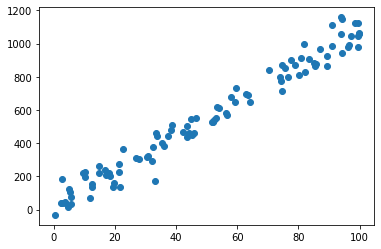

In [252]:
plt.scatter(X_1d[:, 0], y_1d)

In [264]:
reg_1d = LinearRegression()
reg_1d.fit(X_1d, y_1d)
y_1d_pred = reg_1d.predict(X_1d)

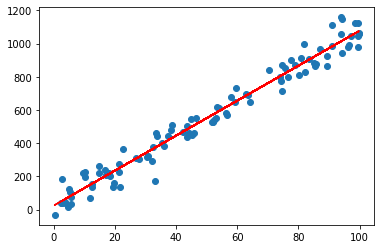

In [265]:
plt.scatter(X_1d[:, 0], y_1d)
plt.plot(X_1d[:, 0], y_1d_pred, c="red")

In [266]:
reg_1d.rsquared

0.031058084697683758